In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\SONAI\Desktop\Project\Big_Mart\Big_Mart.csv')
# Random 100 Observations
df.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1293,FDB11,16.000,Low Fat,0.060943,Starchy Foods,225.6404,OUT049,1999,Medium,Tier 1,Supermarket Type1,2925.5252
2819,DRE03,19.600,Low Fat,0.024222,Dairy,45.5718,OUT035,2004,Small,Tier 2,Supermarket Type1,945.4360
7119,FDV47,NaN,Low Fat,0.094910,Breads,84.5566,OUT019,1985,Small,Tier 1,Grocery Store,253.6698
671,FDO27,6.175,Regular,0.179807,Meat,95.2752,OUT018,2009,Medium,Tier 3,Supermarket Type2,1534.0032
3434,FDT39,6.260,Regular,0.009924,Meat,152.8366,OUT017,2007,NaN,Tier 2,Supermarket Type1,3778.4150
4604,FDL56,NaN,Low Fat,0.125172,Fruits and Vegetables,88.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,3139.9128
4454,FDG47,12.800,Low Fat,0.069902,Starchy Foods,261.3252,OUT018,2009,Medium,Tier 3,Supermarket Type2,3410.2276
5454,NCW42,18.200,Low Fat,0.058707,Household,220.5456,OUT018,2009,Medium,Tier 3,Supermarket Type2,3094.6384
2695,NCL17,7.390,Low Fat,0.067767,Health and Hygiene,140.6812,OUT035,2004,Small,Tier 2,Supermarket Type1,3704.5112
2481,FDC38,15.700,Low Fat,0.122742,Canned,134.2942,OUT045,2002,NaN,Tier 2,Supermarket Type1,1192.4478


# Data Understanding

In [3]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Finding categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='object']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 7 categorical variables
------------------------------------------------------------------------------------------
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [5]:
# Finding numerical variables
numerical_variables = [var for var in df.columns if df[var].dtype!='object']
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*45)
print(numerical_variables)

There are 5 numerical variables
------------------------------------------------------------------------------------------
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [6]:
# Checking shape of the dataset
df.shape

(8523, 12)

There are 8523 rows(intances) and 12 columns(11 featured and 1 Target)

In [7]:
# Basic description of Dataset
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [8]:
# number of unique values in each columns
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

There, 1559 unique products of 16 different types are available across 10 unique outlets(Stores) of 4 different types at 3 different location. And Item_Fat_Content are 5 types.

In [9]:
# The unique values in each column
for var in df.columns:
    print(var,'\n\n',df[var].unique(),'\n')
    print('--'*45)


Item_Identifier 

 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 

------------------------------------------------------------------------------------------
Item_Weight 

 [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.

In [10]:
#Count of unique values in each column  
for var in df.columns:
    print(df[var].value_counts(dropna=False))
    print('--'*45)

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
------------------------------------------------------------------------------------------
NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64
------------------------------------------------------------------------------------------
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
------------------------------------------------------------------------------------------
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype

In [11]:
# Checking for number of null values in dataset
df.isna().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

2410 null values in Outlet_Size and 1463 null values in Item_Weight. Note that item visibility has 0 value which has no significance.

In [12]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values



# Data Cleaning , Feature Engineering and EDA


In [13]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

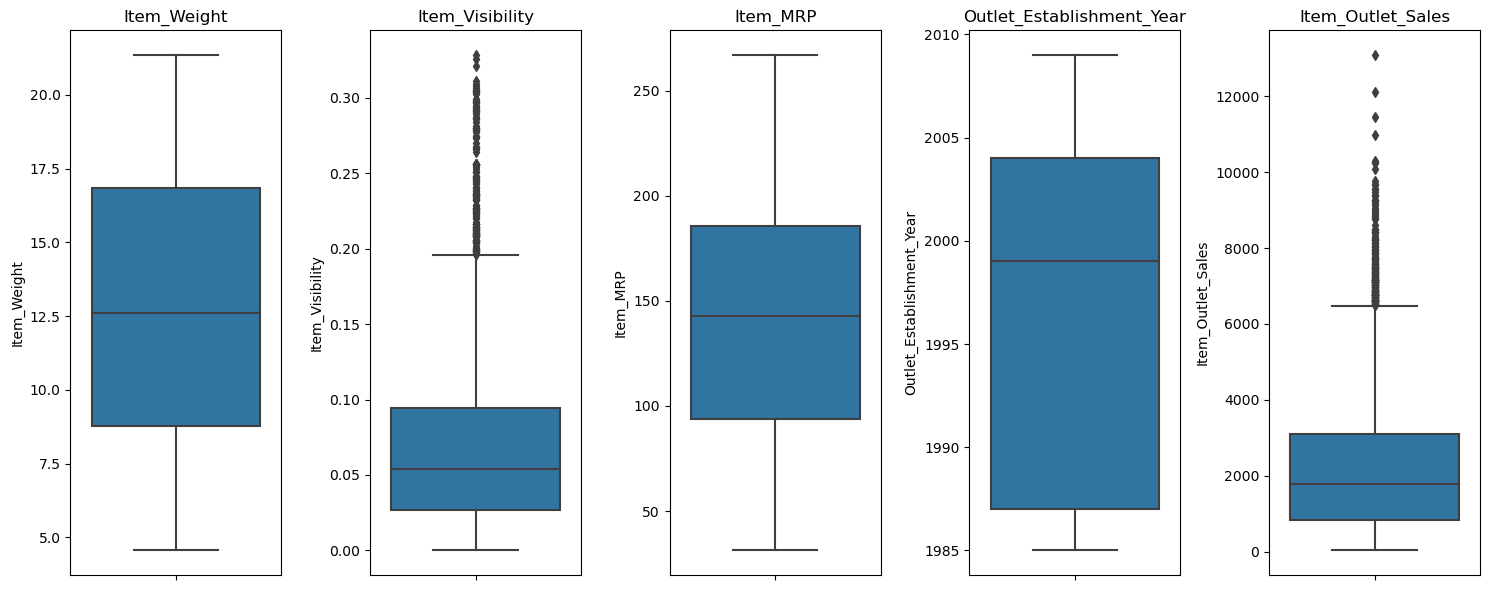

In [15]:
# Box plot to visualizing outliers
fig, axes = plt.subplots(1,(len(numerical_variables)), figsize=(15, 6))
axes = axes.flatten()

for i, var in enumerate(numerical_variables):
    if i<(len(numerical_variables)):
        sns.boxplot(y=df[var], ax=axes[i])
        axes[i].set_title(var)
    else:
        pass
    

plt.tight_layout()
plt.show()

In [16]:
#Percentage of outliers for item visibility
df[df['Item_Visibility']>((0.094585)+(1.5*(0.094585-0.026989)))].shape[0]/8523*100

1.689545934530095

In [17]:
df=df[df['Item_Visibility']<((0.094585)+(1.5*(0.094585-0.026989)))]

__________________________________________________________________________________________


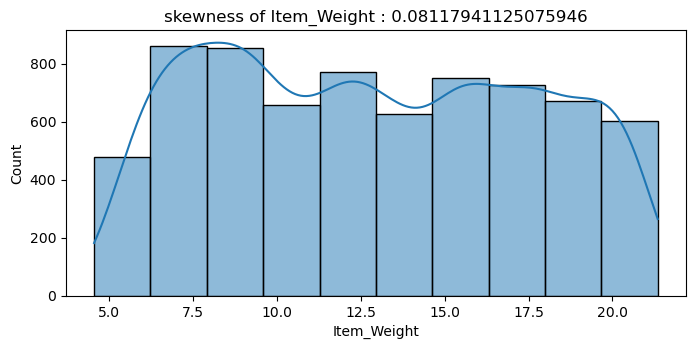

__________________________________________________________________________________________


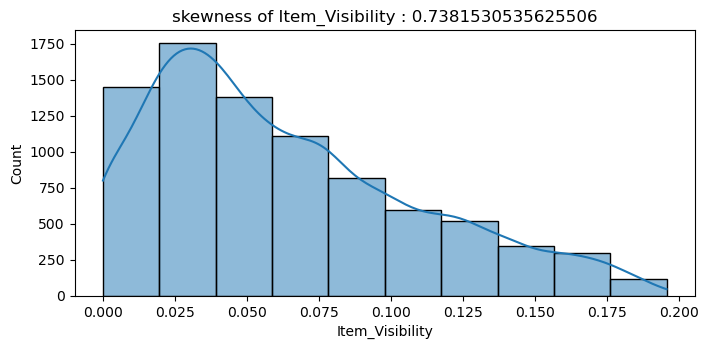

__________________________________________________________________________________________


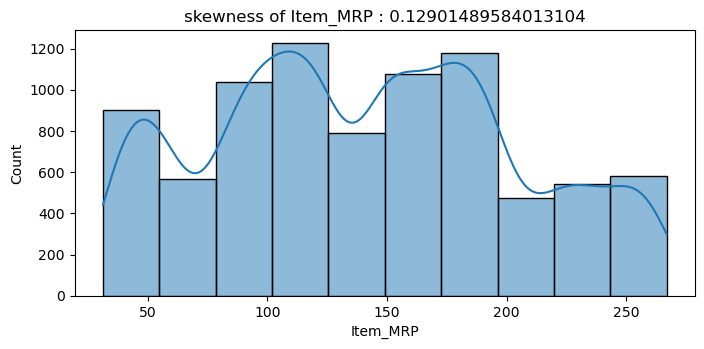

__________________________________________________________________________________________


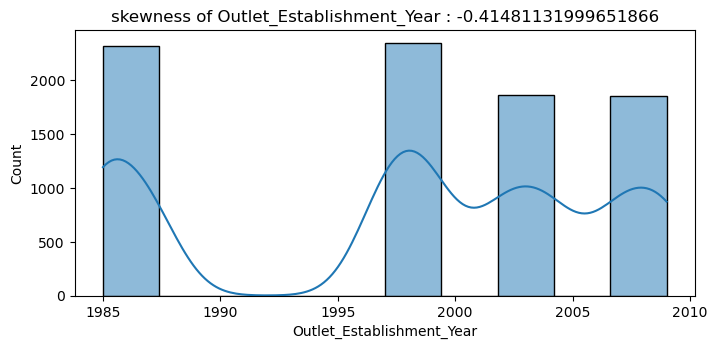

__________________________________________________________________________________________


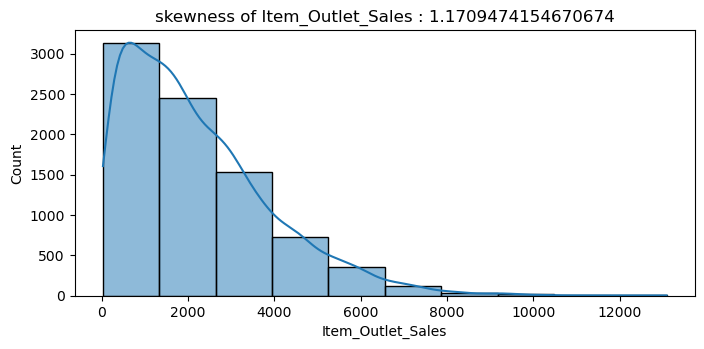

In [18]:
#Distribution and skewness of all numerical features and target feature
for var in numerical_variables:
    plt.figure(figsize=(8,20))
    plt.subplot(len(numerical_variables),1,1)
    ax=sns.histplot(data=df,x=df[var],kde=True,bins=10)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

In [19]:
#Replacing null with mean for numerical variables 'Item_Weight'
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

As the distribution of item weight is very less skewed so null values are imputed with its mean

In [20]:
# Verify if all null and irrelavent values are removed
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2343
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
#Count of unique values in Categorical column  
for var in categorical_variables:
    print(df[var].value_counts(dropna=False))
    print('--'*45)

FDW13    10
FDX20     9
FDG09     9
FDD38     9
NCI54     9
         ..
FDK57     1
FDN52     1
DRE01     1
FDO33     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64
------------------------------------------------------------------------------------------
Low Fat    5016
Regular    2831
LF          307
reg         116
low fat     109
Name: Item_Fat_Content, dtype: int64
------------------------------------------------------------------------------------------
Fruits and Vegetables    1208
Snack Foods              1181
Household                 897
Frozen Foods              845
Dairy                     670
Canned                    638
Baking Goods              631
Health and Hygiene        516
Soft Drinks               439
Meat                      418
Breads                    248
Hard Drinks               211
Others                    167
Starchy Foods             143
Breakfast                 106
Seafood                    61
Name: Item_Type, dtype: int64
---------

In [22]:
#There is a similarity between Item_Identifier and Item_Type
#Item_Type has been changed according to that similarity
df['Item_Type'] = df['Item_Identifier'].str[:2]
df['Item_Type'] = df['Item_Type'].replace({'FD': 'Food', 'DR': 'Drinks', 'NC': 'Non-Consumable'})
df.Item_Type.value_counts()

Food              6010
Non-Consumable    1580
Drinks             789
Name: Item_Type, dtype: int64

In [23]:
# Replace reapted values in Item_Fat_Content
df['Item_Fat_Content'] = df.Item_Fat_Content.replace(['LF', 'low fat', 'reg'],['Low Fat','Low Fat', 'Regular'])
df.Item_Fat_Content.value_counts()

Low Fat    5432
Regular    2947
Name: Item_Fat_Content, dtype: int64

Item_identifier ID has first two charachters defining the item type, these are FD, DR, NC means 'Food', 'Drinks', 'Non-Consumables'. Converting Item_Type into these 3 categories Food, Drinks,Non-Consumable. And repeated values in 'Item_Fat_Content' are replaced.

In [24]:
# number of unique values in each categorical_variables
df[categorical_variables].nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                  3
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

After feature engineering, 1559 unique products of 3 different types are available there, across 10 unique outlets(Stores) of 4 different types at 3 different location. And Item_Fat_Content are two types.

In [25]:
#Count of unique values in Numerical column  
for var in numerical_variables:
    print(df[var].value_counts(dropna=False))
    print('--'*45)

12.866211    1386
12.150000      85
17.600000      82
13.650000      77
11.800000      76
             ... 
7.605000        1
6.520000        1
9.420000        1
7.685000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64
------------------------------------------------------------------------------------------
0.000000    526
0.076975      3
0.093914      2
0.086765      2
0.046825      2
           ... 
0.124646      1
0.054142      1
0.018920      1
0.044974      1
0.044878      1
Name: Item_Visibility, Length: 7736, dtype: int64
------------------------------------------------------------------------------------------
172.0422    7
196.5768    6
188.1872    6
142.0154    6
196.5084    6
           ..
152.6682    1
180.5660    1
155.1340    1
106.2306    1
75.4670     1
Name: Item_MRP, Length: 5874, dtype: int64
------------------------------------------------------------------------------------------
1985    1386
1987     932
1999     930
1997     930
2004     

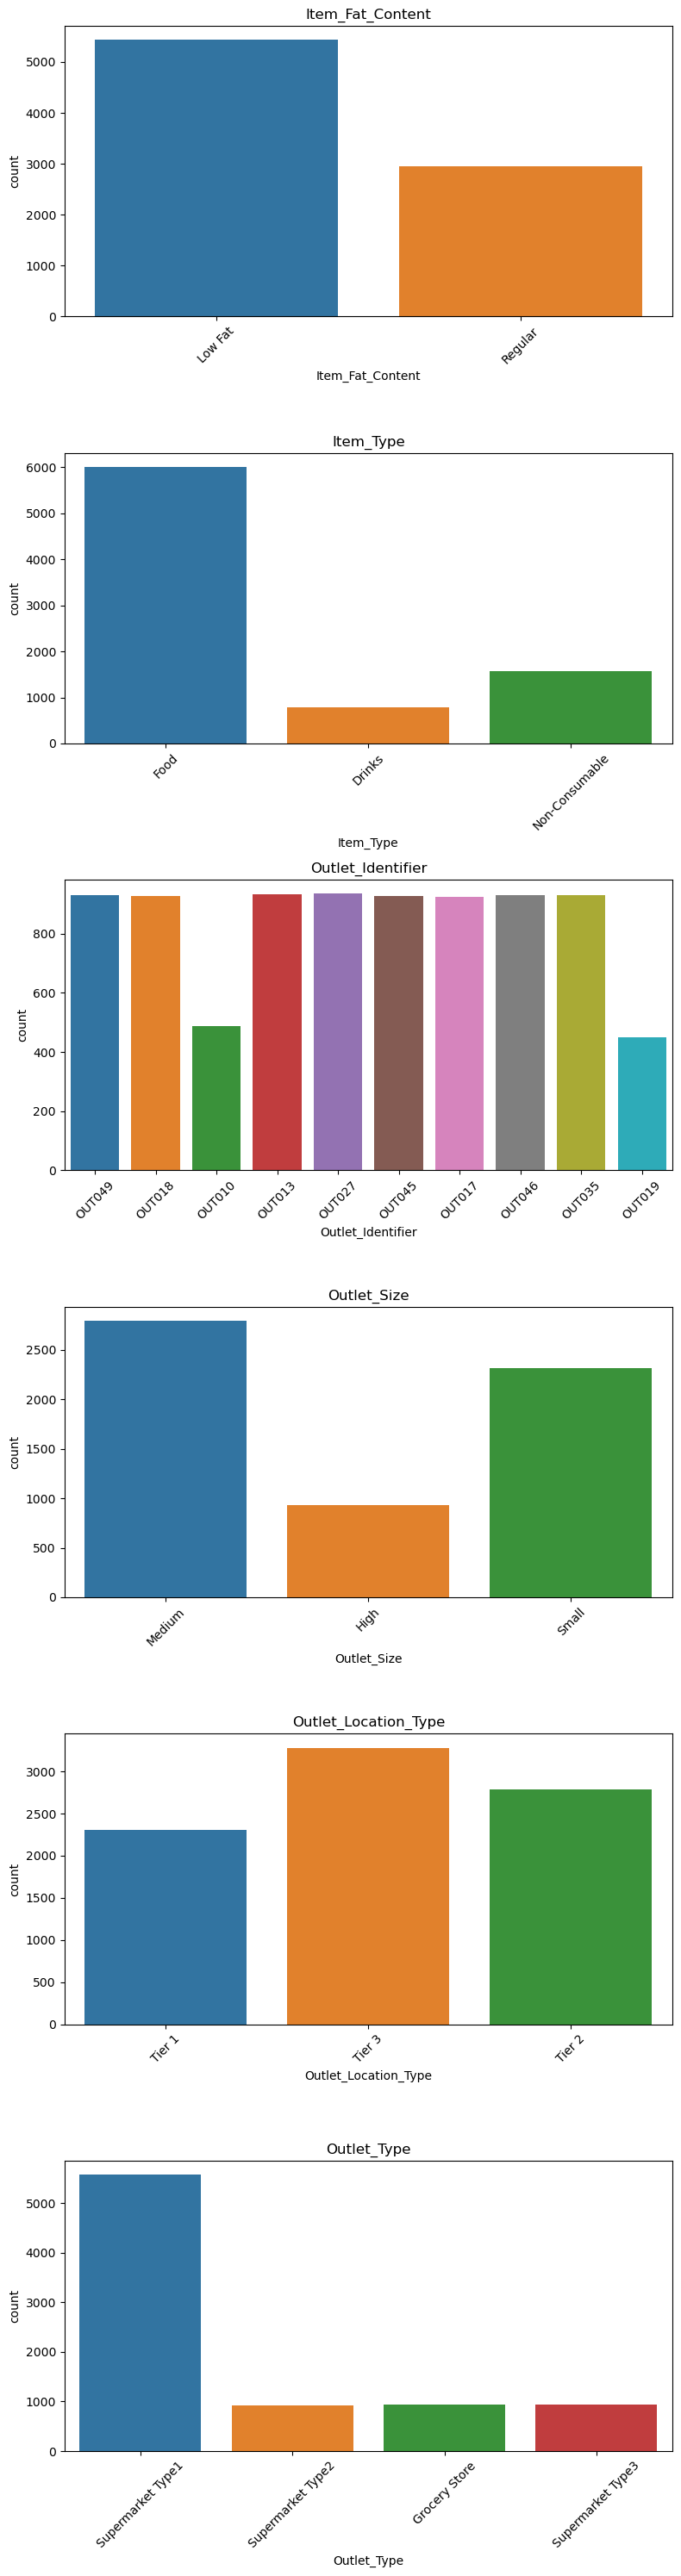

In [26]:
#Countplots of all categorical Features except 'Item_Identifier' as it has 1559 unique values
fig, axes = plt.subplots((len(categorical_variables)-1), 1, figsize=(8, 30))
axes = axes.flatten()

for i, var in enumerate(categorical_variables[1:]):
        sns.countplot(data=df, x=var, ax=axes[i])
        axes[i].set_title(var)
        axes[i].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

Item_Fat_Content: Most Items sold are low Fat.
Item_Type: Food Items are more popular.
Outlet_Identifier: Sold items are ditributed evenly amoung all stores, execpt OUT019 and OUT010.
Outlet_Size: Bigmart Stores are mostly in medium size in this data.
Outlet_Location_Type: Most products are sold in Tier3.
Outlet_Type: Most Store Types are SuperMarket Type1.

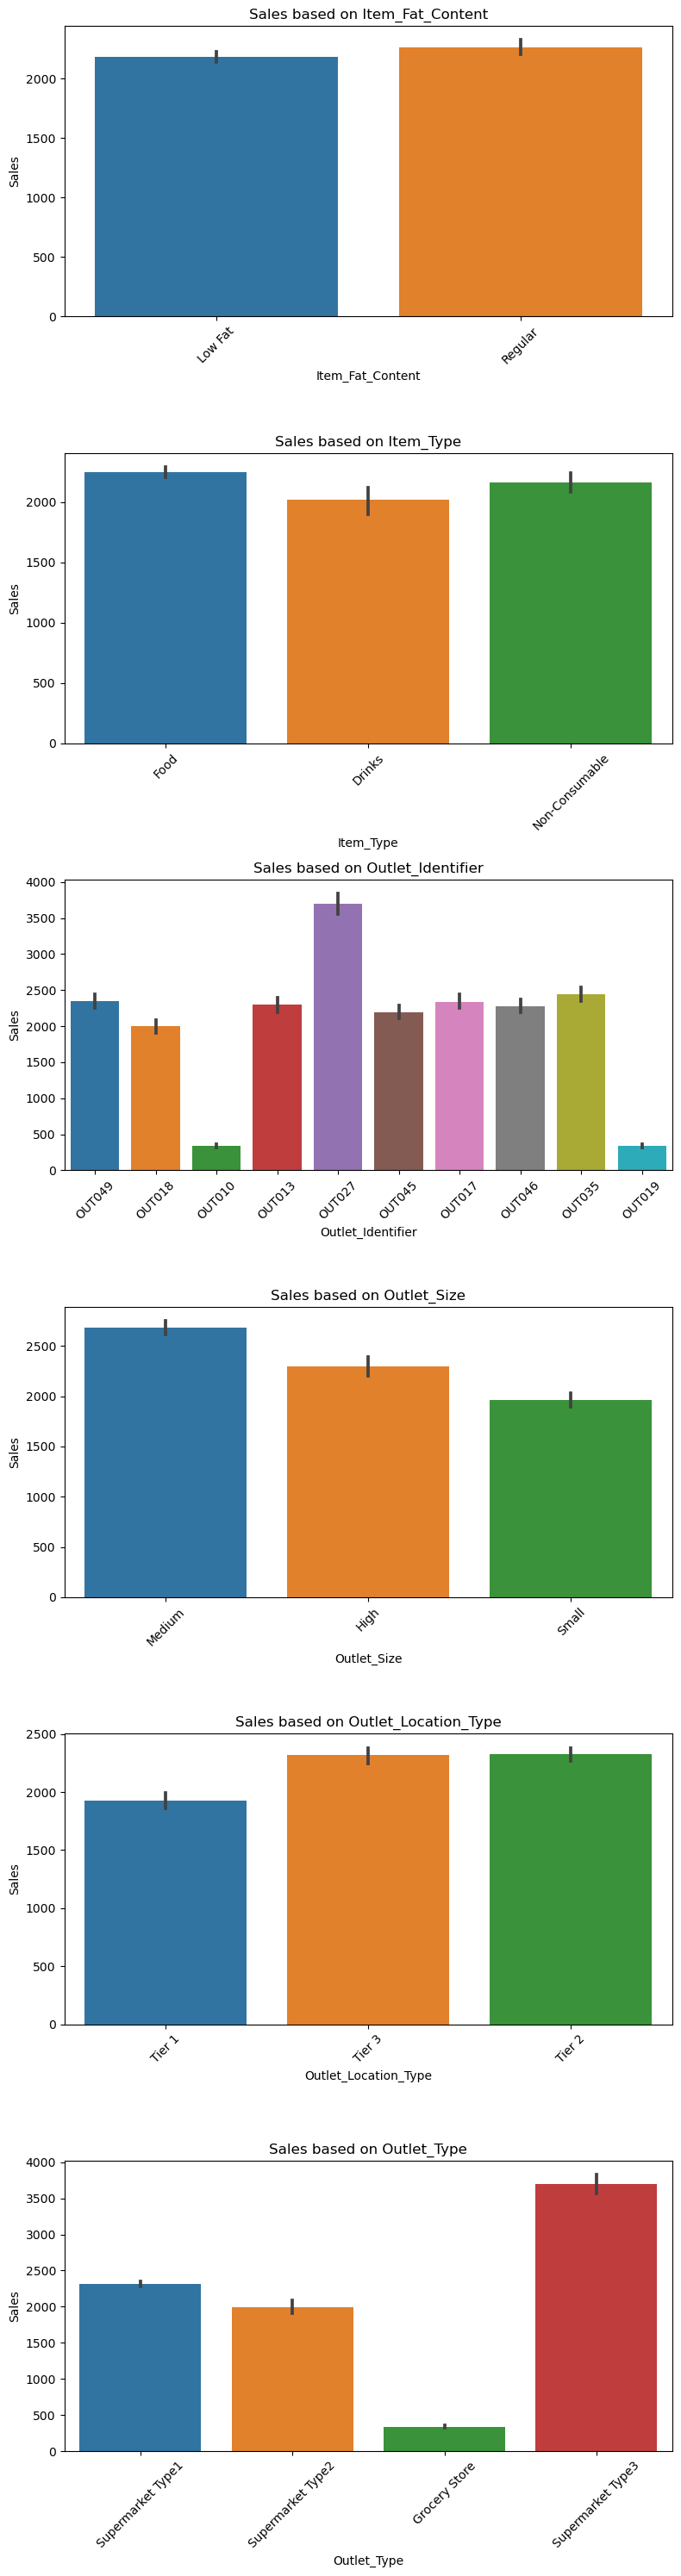

In [27]:
# BarPlot for Sales per categorical features except 'Item_Identifier'

# Create subplots
fig, axes = plt.subplots(len(categorical_variables) - 1, 1, figsize=(8, 30))
axes = axes.flatten()

# Iterate over categorical variables and create bar plots
for i, var in enumerate(categorical_variables[1:]):
    ax = sns.barplot(data=df, x=var, y='Item_Outlet_Sales', ax=axes[i])
    ax.set_title(f'Sales based on {var}')
    
    # Rotate x-axis labels by 90 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    # Set y-axis label
    ax.set_xlabel(var)
    ax.set_ylabel('Sales')

plt.tight_layout()
plt.show()

Outlet_Identifier: Outlet027 has most profitable, and Outlet019 and Outlet010 has least Sells.
Outlet_Size: Sells are moreven in Medium and High size Stores.
Outlet_Location_Type: Most sells are through Tier3 and Tier2, Tier2 is slightly higher.
Outlet_Type: Most Sells are through SuperMarket Type3.

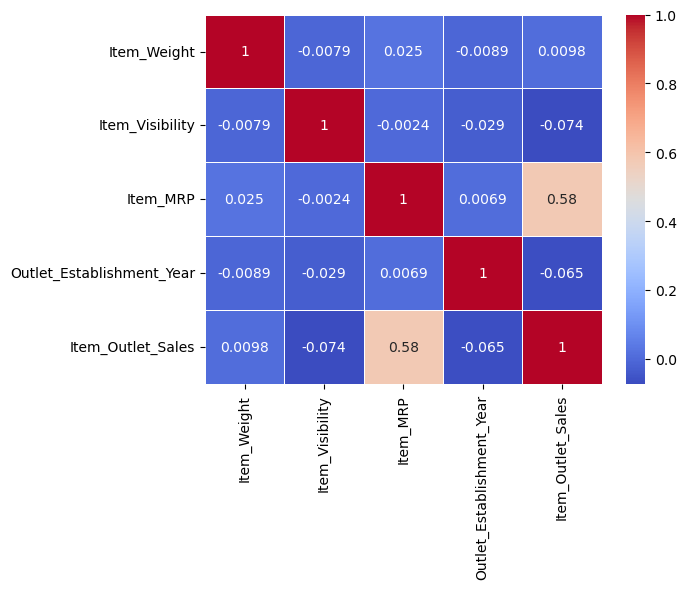

In [28]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

# Data Encoding 

In [29]:
for var in df.columns:
    print(var,'\t',df[var].dtypes,'\t',df[var].nunique())
    print('--'*45)

Item_Identifier 	 object 	 1559
------------------------------------------------------------------------------------------
Item_Weight 	 float64 	 416
------------------------------------------------------------------------------------------
Item_Fat_Content 	 object 	 2
------------------------------------------------------------------------------------------
Item_Visibility 	 float64 	 7736
------------------------------------------------------------------------------------------
Item_Type 	 object 	 3
------------------------------------------------------------------------------------------
Item_MRP 	 float64 	 5874
------------------------------------------------------------------------------------------
Outlet_Identifier 	 object 	 10
------------------------------------------------------------------------------------------
Outlet_Establishment_Year 	 int64 	 9
------------------------------------------------------------------------------------------
Outlet_Size 	 object 	 3
-----

Substitue categorical variables with weighted mean

In [30]:
a1 = df.groupby('Item_Identifier')['Item_Outlet_Sales'].mean()
a1=round(a1)
a11=a1.to_dict()
df['Item_Identifier'] = df['Item_Identifier'].map(a11)

In [31]:
a2 = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()
a2=round(a2)
a22=a2.to_dict()
df['Outlet_Identifier'] = df['Outlet_Identifier'].map(a22)

In [32]:
a3 = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
a3=round(a3)
a33=a3.to_dict()
df['Outlet_Type'] = df['Outlet_Type'].map(a33)

In [33]:
a4 = df.groupby('Item_Type')['Item_Outlet_Sales'].mean()
a4=round(a4)
a44=a4.to_dict()
df['Item_Type'] = df['Item_Type'].map(a44)

In [34]:
# Mapping the categorical variables whoes having limited categories
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})
df['Outlet_Size'] = df['Outlet_Size'].map({'Medium':1,'High':2,'Small':0})
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})

In [35]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,5198.0,9.30,0,0.016047,2251.0,249.8092,2348.0,1999,1.0,0,2316.0,3735.1380
1,862.0,5.92,1,0.019278,2019.0,48.2692,1995.0,2009,1.0,2,1995.0,443.4228
2,1478.0,17.50,0,0.016760,2251.0,141.6180,2348.0,1999,1.0,0,2316.0,2097.2700
3,3021.0,19.20,1,0.000000,2251.0,182.0950,341.0,1998,NaN,2,339.0,732.3800
4,654.0,8.93,0,0.000000,2164.0,53.8614,2299.0,1987,2.0,2,2316.0,994.7052


In [36]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [37]:
df.nunique()

Item_Identifier              1259
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7736
Item_Type                       3
Item_MRP                     5874
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                    11
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3474
dtype: int64

In [38]:
# Checking basic information of dataset after feature encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8379 entries, 0 to 8378
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8379 non-null   float64
 1   Item_Weight                8379 non-null   float64
 2   Item_Fat_Content           8379 non-null   float64
 3   Item_Visibility            8379 non-null   float64
 4   Item_Type                  8379 non-null   float64
 5   Item_MRP                   8379 non-null   float64
 6   Outlet_Identifier          8379 non-null   float64
 7   Outlet_Establishment_Year  8379 non-null   float64
 8   Outlet_Size                8379 non-null   float64
 9   Outlet_Location_Type       8379 non-null   float64
 10  Outlet_Type                8379 non-null   float64
 11  Item_Outlet_Sales          8379 non-null   float64
dtypes: float64(12)
memory usage: 785.7 KB


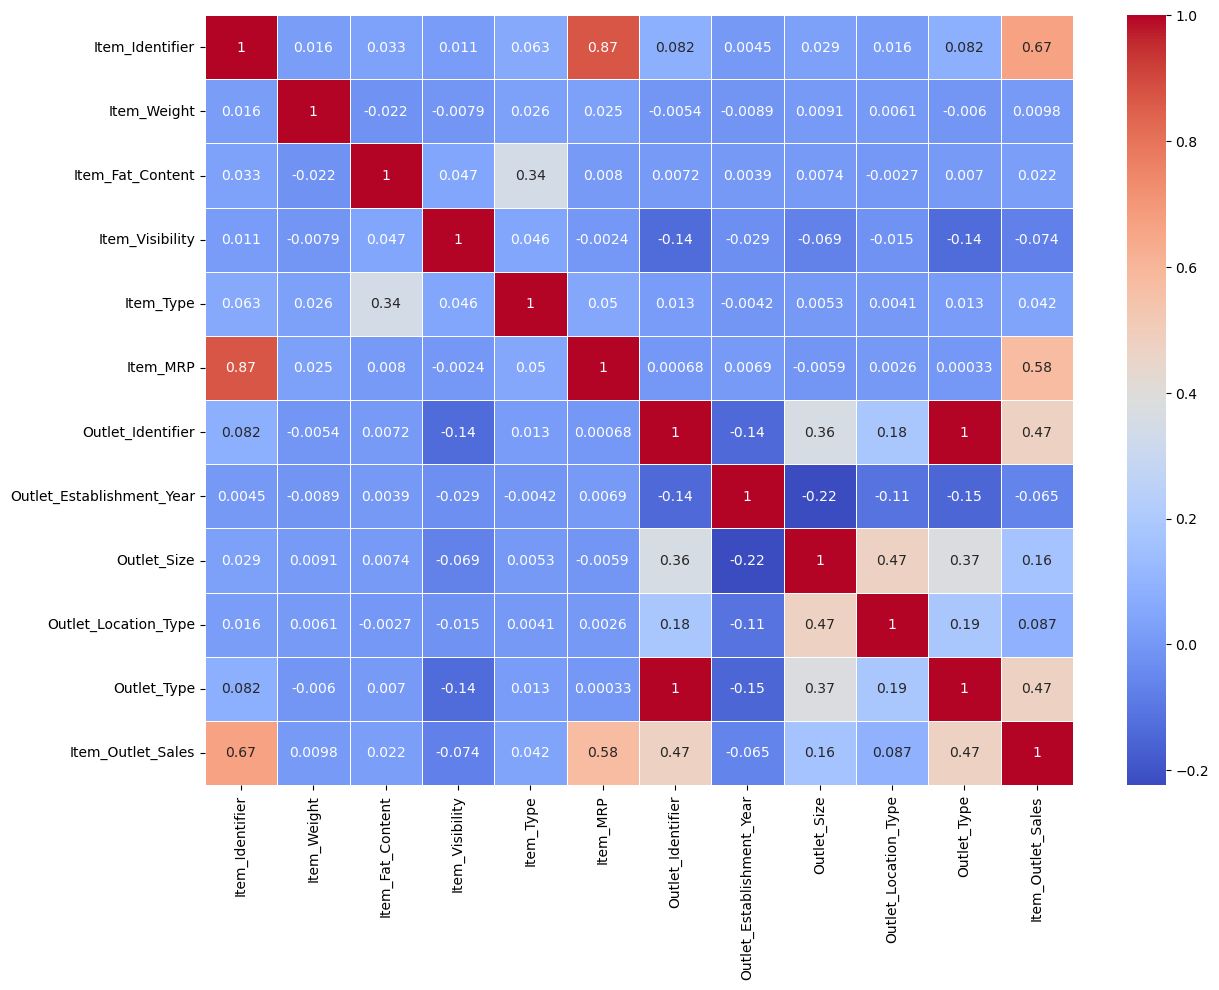

In [39]:
#Check for multicollinearity
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

The dependent features are not highly correlated so all featured are considered

# Q-Q Plot

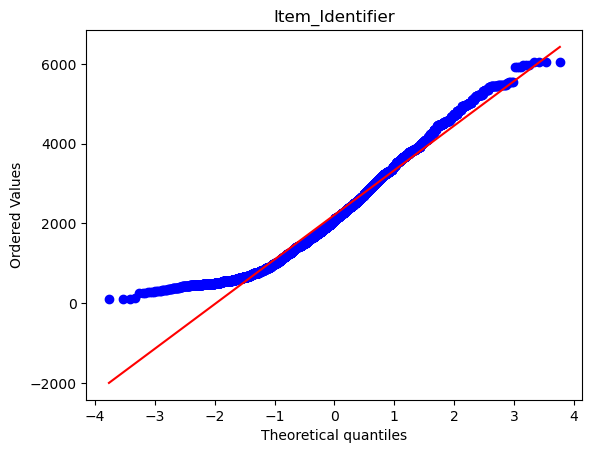

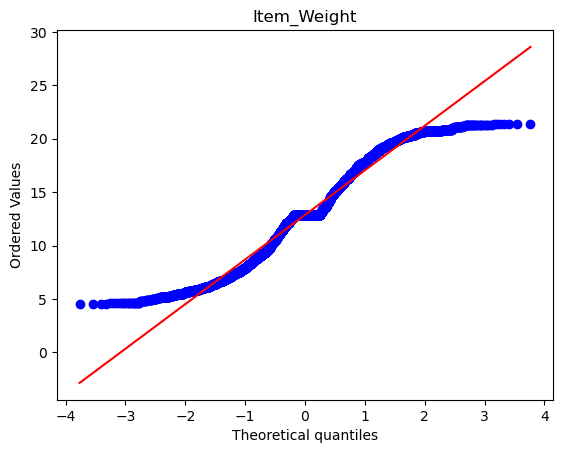

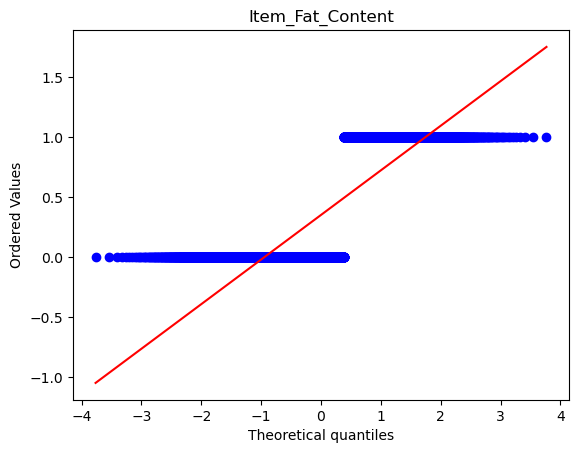

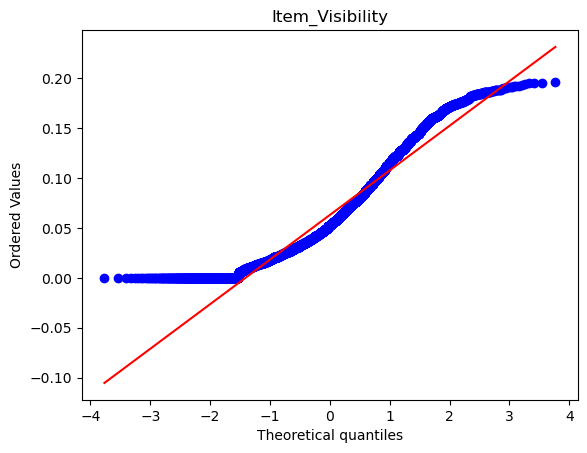

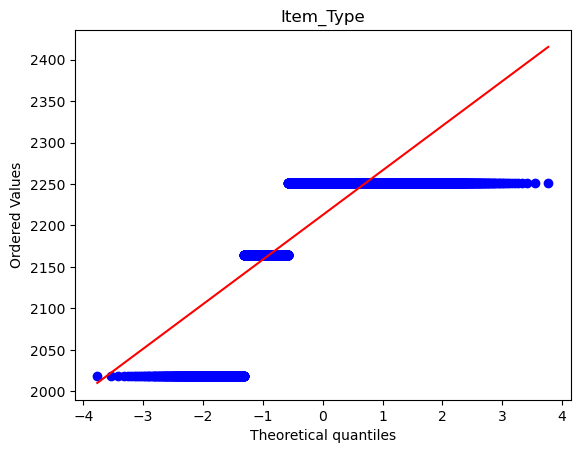

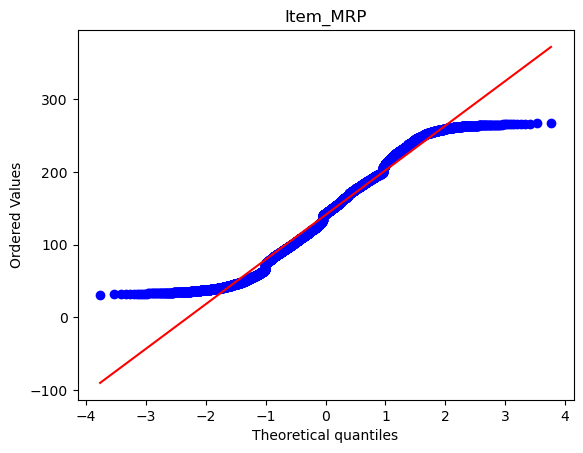

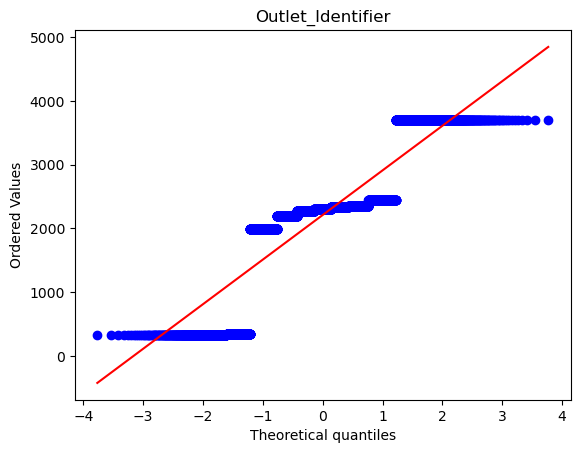

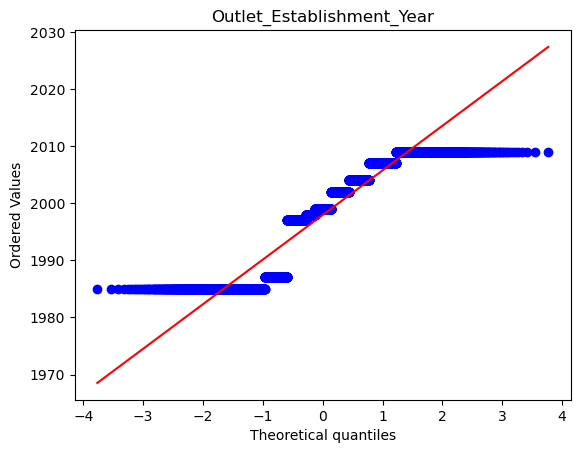

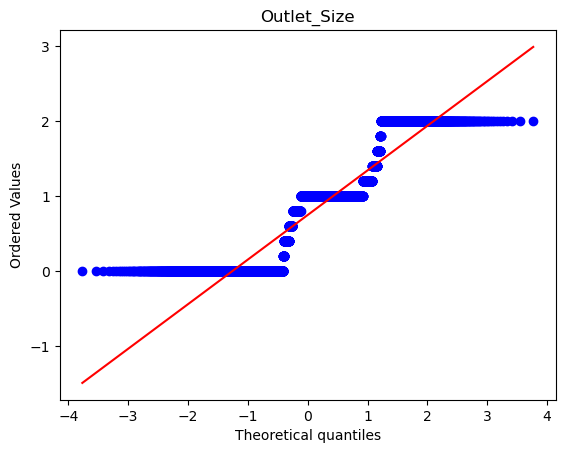

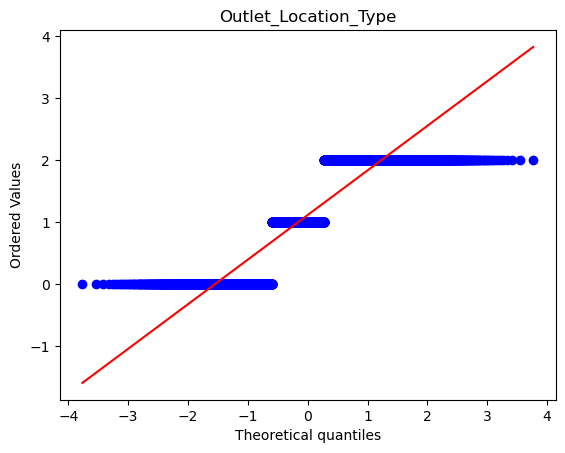

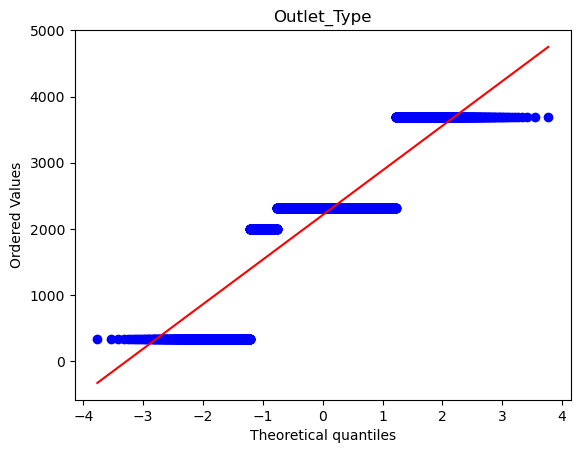

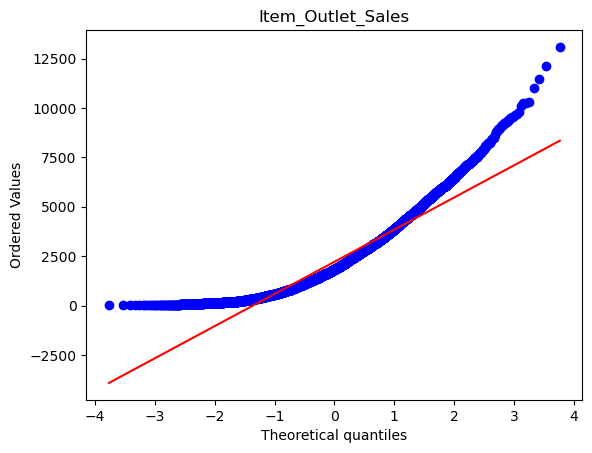

In [40]:
from scipy import stats
for i in df.columns:
    stats.probplot(df[i], dist="norm", plot=plt)
    plt.title(i)
    plt.show()

In [41]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
b,a = dmatrices('Item_Outlet_Sales ~ Item_Identifier + Item_Weight + Item_Fat_Content + Item_Visibility + Item_Type + Item_MRP + Outlet_Identifier + Outlet_Establishment_Year + Outlet_Size + Outlet_Location_Type + Outlet_Type',data=df,return_type='dataframe')

vif  = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['variable'] = a.columns

vif

,VIF,variable
0,63239.875916,Intercept
1,4.162685,Item_Identifier
2,1.002920,Item_Weight
3,1.135886,Item_Fat_Content
4,1.029323,Item_Visibility
5,1.137528,Item_Type
6,4.128081,Item_MRP
7,188.391995,Outlet_Identifier
8,1.079709,Outlet_Establishment_Year
9,1.564342,Outlet_Size


In [42]:
#VIF after dropping outlet_Type
b,a = dmatrices('Item_Outlet_Sales ~ Item_Identifier + Item_Weight + Item_Fat_Content + Item_Visibility + Item_Type + Item_MRP + Outlet_Identifier + Outlet_Establishment_Year + Outlet_Size + Outlet_Location_Type',data=df,return_type='dataframe')

vif  = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['variable'] = a.columns

vif

,VIF,variable
0,62128.994149,Intercept
1,4.162547,Item_Identifier
2,1.002732,Item_Weight
3,1.135881,Item_Fat_Content
4,1.029064,Item_Visibility
5,1.137514,Item_Type
6,4.127951,Item_MRP
7,1.198916,Outlet_Identifier
8,1.060871,Outlet_Establishment_Year
9,1.467837,Outlet_Size


In [43]:
df.drop('Outlet_Type',axis=1,inplace=True)

# OLS

In [117]:
import statsmodels.api as sm
mod = sm.OLS(b,a)
fii = mod.fit()
fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     1397.
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        08:30:29   Log-Likelihood:                -70120.
No. Observations:                8379   AIC:                         1.403e+05
Df Residuals:                    8368   BIC:                         1.403e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  2984.9286   2841.173      1.051      0.293   -2584.474    8554.331
Item_Identifier               0.7906      0.021     38.565      0.000       0.750       0.831
Item_Weight                   0.2364      2.691      0.088      0.930      -5.038       5.511
Item_Fat_Content              9.0982     25.441      0.358      0.721     -40.773      58.969
Item_Visibility            -781.5643    250.679     -3.118      0.002   -1272.958    -290.170
Item_Type                    -0.0680      0.171     -0.397      0.692      -0.404       0.268
Item_MRP                      3.3021      0.372      8.879      0.000       2.573       4.031
Outlet_Identifier             0.9046      0.015     58.632      0.000       0.874       0.935
Outlet_Establishment_Year    -2.3940      1.406     -1.703      0.089      -5.150       0.362
Outlet_Size                 -22.2587     21.317     -1.044      0.296     -64.046      19.528
Outlet_Location_Type          4.0102     15.983      0.251      0.802     -27.321      35.341
==============================================================================
Omnibus:                      712.284   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1721.743
Skew:                           0.514   Prob(JB):                         0.00
Kurtosis:                       4.969   Cond. No.                     1.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# BP-TEST

In [129]:
#Checking Homoscedaticity
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan
names = ('LM_Stat', 'L_p-value','F_Stat', 'F_p-value')

test_result = sms.het_breuschpagan(fii.resid, fii.model.exog)
res=pd.DataFrame(test_result,names)
res

,0
LM_Stat,1.320300e+03
L_p-value,1.590022e-277
F_Stat,1.565200e+02
F_p-value,2.124972e-302


# Train-Test splitting

In [44]:
#Seperating dependent and independent variables
y=df[['Item_Outlet_Sales']]
X=df.drop('Item_Outlet_Sales',axis=1)

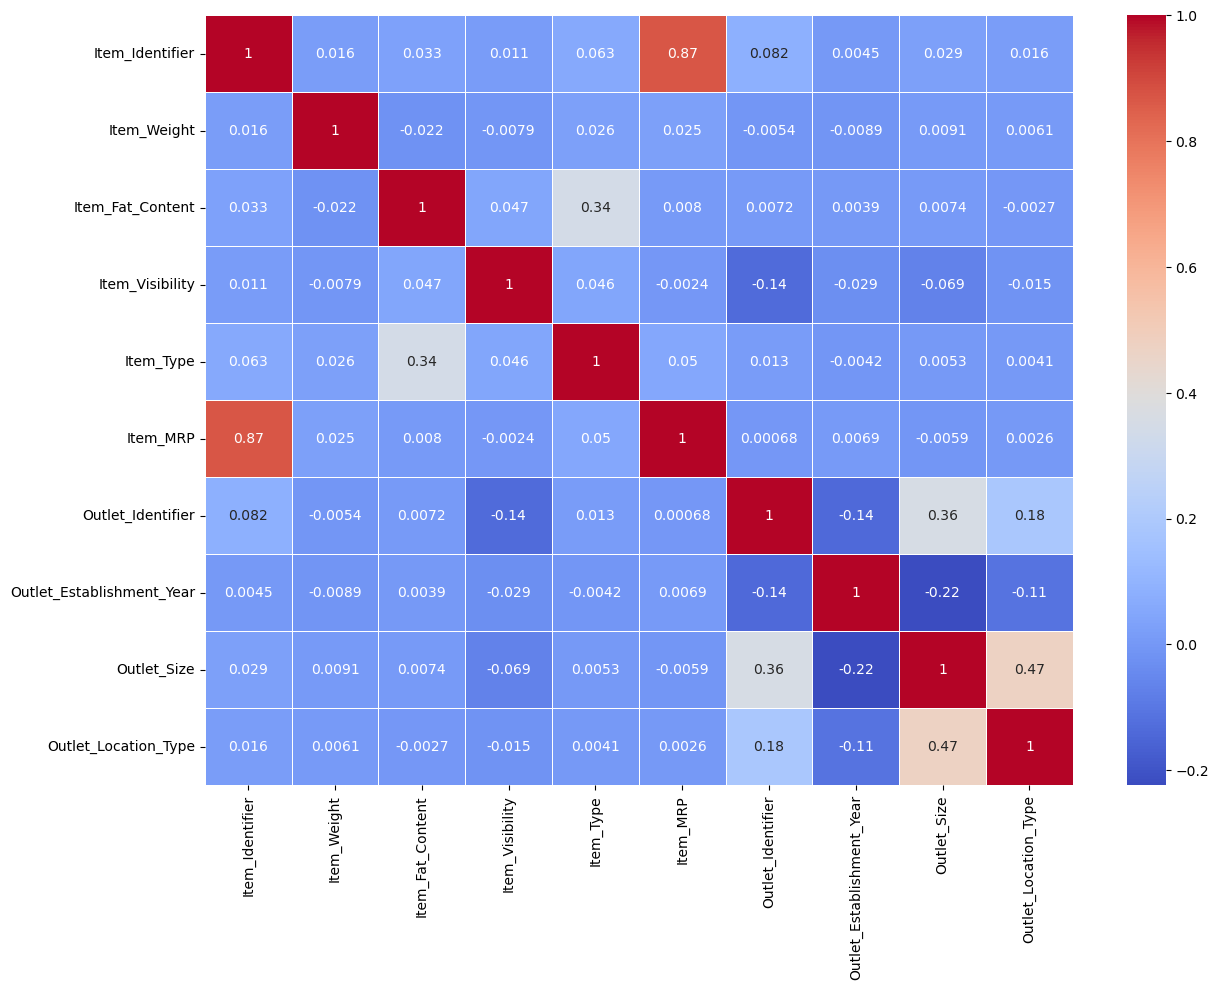

In [45]:
#Check for multicollinearity
plt.figure(figsize=(14, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

In [73]:
from sklearn.model_selection import train_test_split

# X is your feature matrix and y is your target variable
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Standarization

In [74]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train1)
X_test_Scaled = scaler.transform(X_test1)

In [75]:
X_train=pd.DataFrame(X_train_Scaled)
X_test=pd.DataFrame(X_test_Scaled)

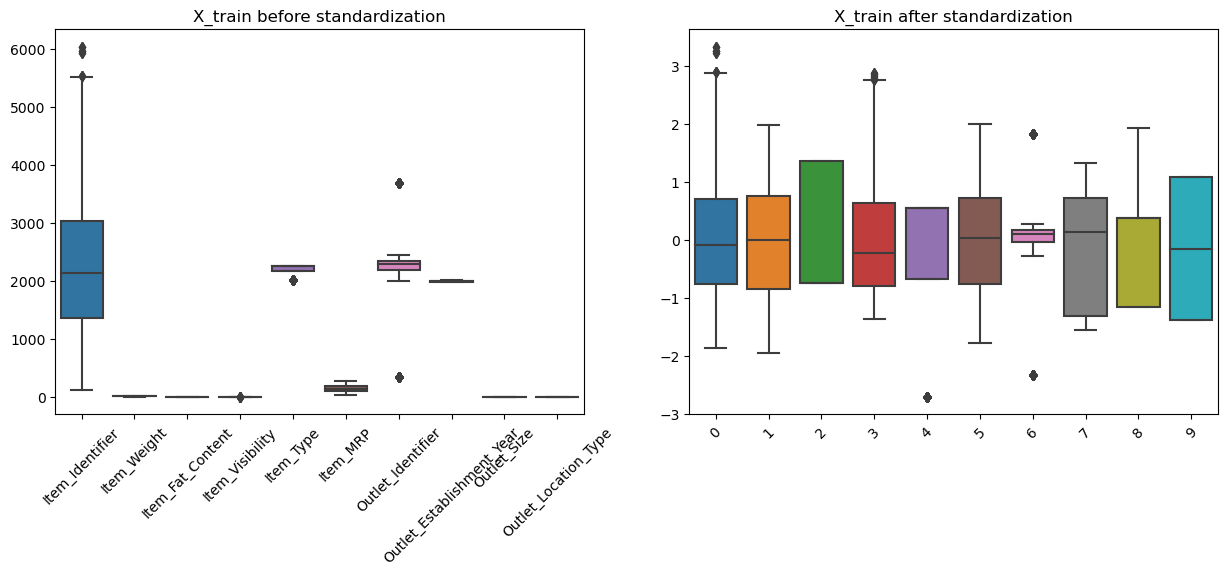

In [102]:
#Box Plots to understand the effect of standarization

# Create a figure with subplots and set the figure size
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# First subplot
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train1)
plt.xticks(rotation=45)
plt.title("X_train before standardization")

# Second subplot
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train)
plt.xticks(rotation=45)
plt.title("X_train after standardization")

# Display the plot
plt.show()


# Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2 
import numpy as np  # Add this import statement

# Model
model = LinearRegression()

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics for Regression:
LR_MAE = MAE(y_test, y_predict)
LR_MSE = MSE(y_test, y_predict)
LR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Squared Mean Squared Error: {np.sqrt(LR_MSE)}\n")
print(f" R^2 Score: {LR_R_2}\n")


 Mean Absolute Error: 756.2401250982464

 Squared Mean Squared Error: 1035.8154823874193

 R^2 Score: 0.6211228812530587



In [63]:
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficients: [[904.59167848   7.71005354  -3.01333359 -37.17081714  -6.07431727
  199.81197735 729.33920331 -16.91241886 -21.23802619   9.64789971]]
Intercept: [2235.17900251]


In [64]:
coefficient=[904.59167848,7.71005354, -3.01333359, -37.17081714,  -6.07431727,
  199.81197735, 729.33920331, -16.91241886, -21.23802619 ,  9.64789971]
df1 = pd.DataFrame({'feature': X.columns, 'coefficient': coefficient})
df1.sort_values(by='coefficient',ascending=False)

,feature,coefficient
0,Item_Identifier,904.591678
6,Outlet_Identifier,729.339203
5,Item_MRP,199.811977
9,Outlet_Location_Type,9.647900
1,Item_Weight,7.710054
2,Item_Fat_Content,-3.013334
4,Item_Type,-6.074317
7,Outlet_Establishment_Year,-16.912419
8,Outlet_Size,-21.238026
3,Item_Visibility,-37.170817


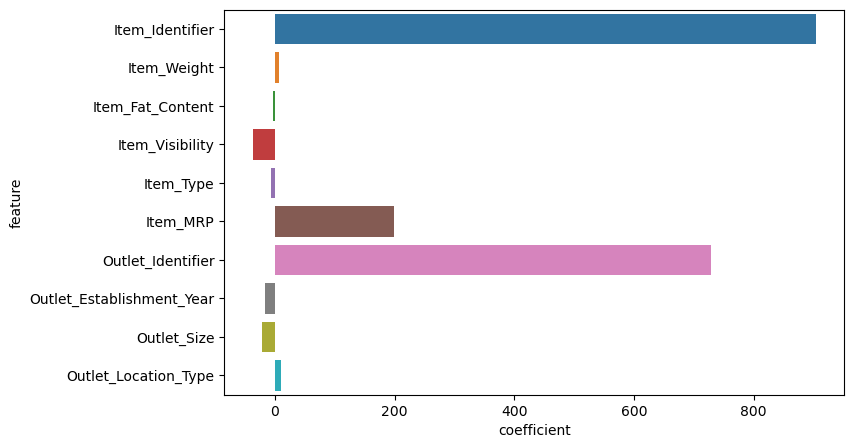

In [68]:
plt.figure(figsize=(8,5))
sns.barplot(df1,x='coefficient',y='feature')
plt.show()

In [95]:
y_actual=y_test.values

In [96]:
residuals = y_actual - y_predict

In [97]:
residuals

array([[ 1029.40510531],
       [ -363.26147702],
       [  454.66456558],
       ...,
       [  849.95140892],
       [  230.57091978],
       [-1118.19316948]])

In [98]:
residual = residuals.flatten()

In [99]:
from scipy.stats import shapiro

stat, p_value = shapiro(residual)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

if p_value > 0.05:
    print('Residuals appear to be normally distributed.')
else:
    print('Residuals do not appear to be normally distributed.')

Shapiro-Wilk Test Statistic: 0.9676644206047058, p-value: 6.301018330825483e-19
Residuals do not appear to be normally distributed.


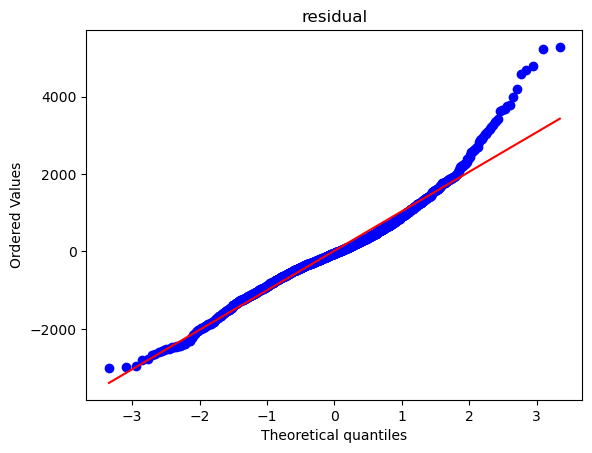

In [101]:
stats.probplot(residual, dist="norm", plot=plt)
plt.title('residual')
plt.show()

# Decision Tree

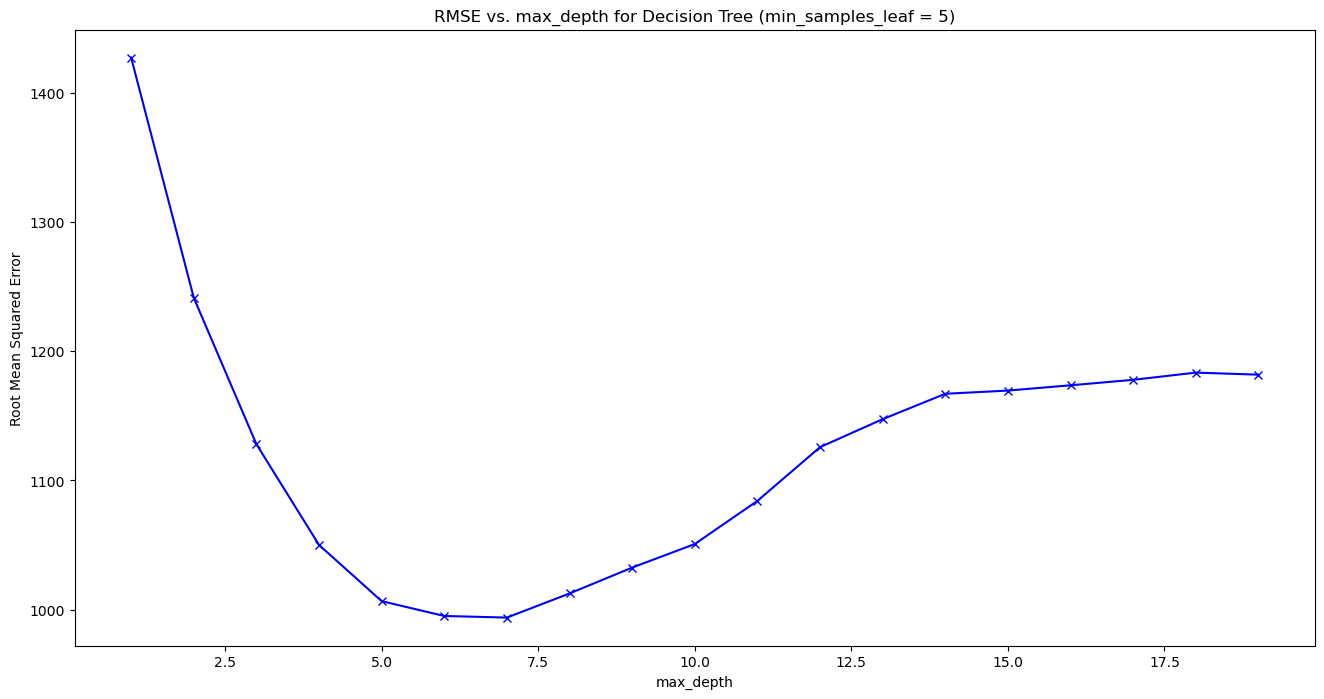

In [113]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

max_depth_values = list(range(1, 20))
min_samples_leaf = 5  # Values to tune

# Create a list to store the results
error = []

for max_depth in max_depth_values:
    clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    error.append(np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(16, 8))
plt.plot(max_depth_values, error, 'bx-')
plt.xlabel('max_depth')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs. max_depth for Decision Tree (min_samples_leaf = 5)')
plt.show()  

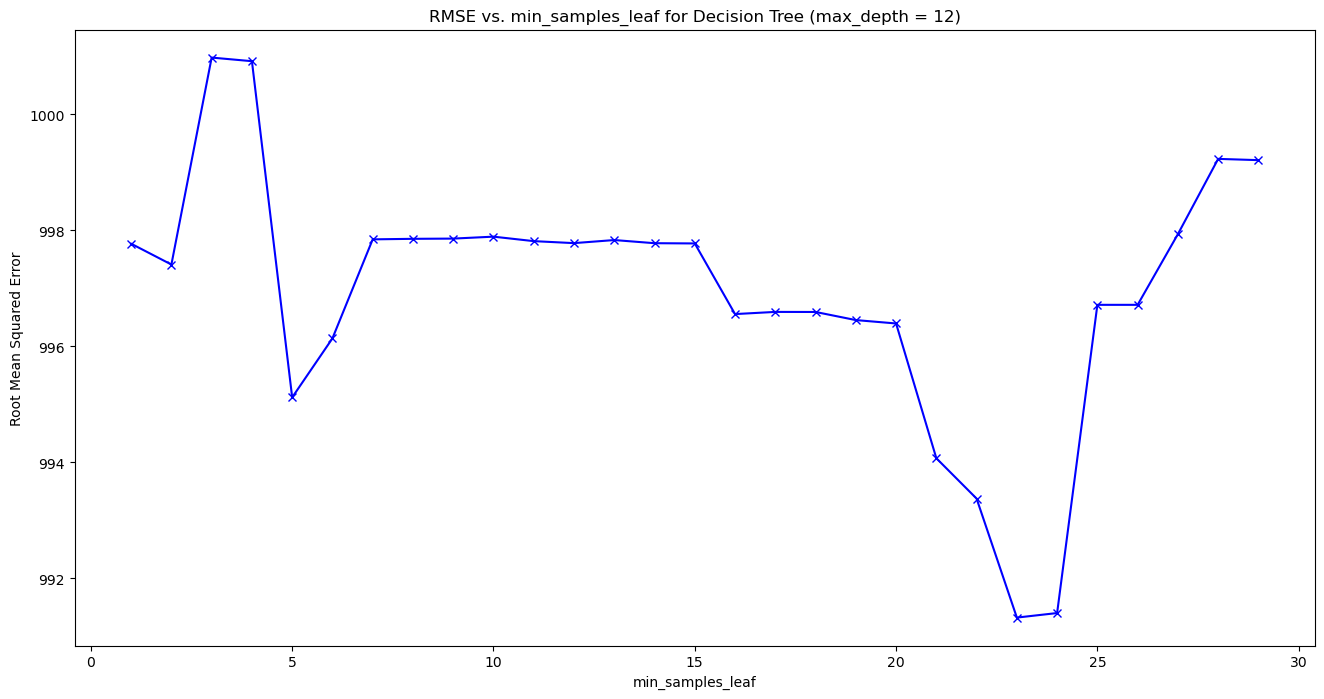

In [114]:
max_depth = 6
min_samples_leaf_values = list(range(1, 30))  # Values to tune

# Create a list to store the results
error = []

for min_samples_leaf in min_samples_leaf_values:
    clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    error.append(np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(16, 8))
plt.plot(min_samples_leaf_values, error, 'bx-')
plt.xlabel('min_samples_leaf')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs. min_samples_leaf for Decision Tree (max_depth = 12)')
plt.show()

In [115]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2 

# Create the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=5, min_samples_leaf=23, random_state=42)

# Train the regressor
tree_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_reg.predict(X_test)

# Score Metrics for Decision Tree Regression:
DT_MAE = MAE(y_test, y_pred)
DT_MSE = MSE(y_test, y_pred)
DT_R2 = R2(y_test, y_pred)

print(f" Decision Tree Mean Absolute Error: {DT_MAE}\n")
print(f" Decision Tree Squared Mean Squared Error: {np.sqrt(DT_MSE)}\n")
print(f" Decision Tree R^2 Score: {DT_R2}\n"
     )


 Decision Tree Mean Absolute Error: 701.1111087672018

 Decision Tree Squared Mean Squared Error: 1006.5954776526933

 Decision Tree R^2 Score: 0.6421973674909065



# Random Forest

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2 

# Create the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=14, random_state=42)

# Train the regressor
rf_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_reg.predict(X_test)

# Score Metrics for Random Forest Regression:
RF_MAE = MAE(y_test, y_pred_rf)
RF_MSE = MSE(y_test, y_pred_rf)
RF_R2 = R2(y_test, y_pred_rf)

print(f" Random Forest Mean Absolute Error: {RF_MAE}\n")
print(f" Random Forest Squared Mean Squared Error: {np.sqrt(RF_MSE)}\n")
print(f" Random Forest R^2 Score: {RF_R2}\n")


 Random Forest Mean Absolute Error: 688.5943992021718

 Random Forest Squared Mean Squared Error: 992.8275916932821

 Random Forest R^2 Score: 0.651918246561263

